Covid19 Data Analysis Notebook Expanded
------------------------------------------

### Let's Import the modules 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [3]:
corona_dataset_csv = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

#### Let's check the shape of the dataframe

In [4]:
corona_dataset_csv.shape

(266, 265)

### Task 2.2: Delete the useless columns

In [5]:
corona_dataset_csv.drop(["Lat", "Long"],axis=1, inplace=True)

### Task 2.3: Aggregating the rows by the country

In [6]:
corona_set_aggragated = corona_dataset_csv.groupby("Country/Region").sum()

In [17]:
corona_set_aggragated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616
Albania,0,0,0,0,0,0,0,0,0,0,...,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899
Algeria,0,0,0,0,0,0,0,0,0,0,...,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658
Andorra,0,0,0,0,0,0,0,0,0,0,...,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568
Angola,0,0,0,0,0,0,0,0,0,0,...,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958


### Task 2.4: Visualizing data related to a number of countries
visualization always helps for better understanding of our data.

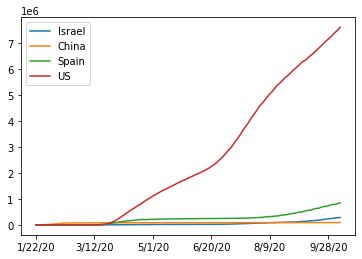

In [18]:
corona_set_aggragated.loc["Israel"].plot()
corona_set_aggragated.loc['China'].plot()
corona_set_aggragated.loc['Spain'].plot()
corona_set_aggragated.loc['US'].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

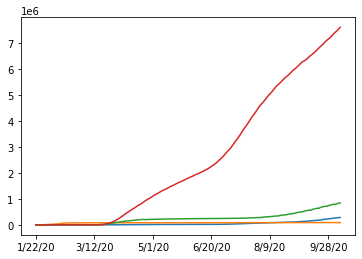

In [19]:
corona_set_aggragated.loc["Israel"].plot()
corona_set_aggragated.loc['China'].plot()
corona_set_aggragated.loc['Spain'].plot()
corona_set_aggragated.loc['US'].plot()

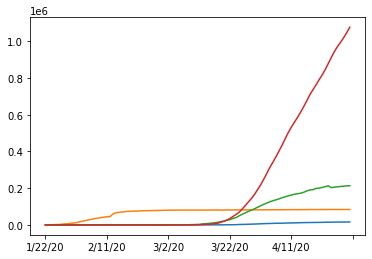

In [22]:
corona_set_aggragated.loc["Israel"][:100].plot()
corona_set_aggragated.loc['China'][:100].plot()
corona_set_aggragated.loc['Spain'][:100].plot()
corona_set_aggragated.loc['US'][:100].plot()

### task 3.1: calculating the first derivative of the curve

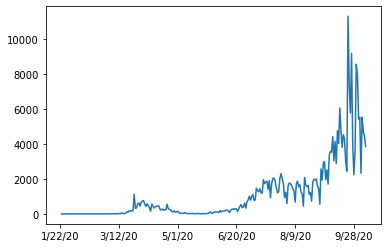

In [23]:
corona_set_aggragated.loc["Israel"].diff().plot()

### task 3.2: find maxmimum infection rate for Israel

In [25]:
corona_set_aggragated.loc["Israel"].diff().max()

11316.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [26]:
countries = list(corona_set_aggragated.index)

In [27]:
max_infection = []
for country in countries:
    max_infection.append(corona_set_aggragated.loc[country].diff().max())
corona_set_aggragated['max_infection'] = max_infection

In [42]:
corona_set_aggragated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,max_infection
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39268,39285,39290,39297,39341,39422,39486,39548,39616,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,13649,13806,13965,14117,14266,14410,14568,14730,14899,178.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,51530,51690,51847,51995,52136,52270,52399,52520,52658,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,2050,2050,2110,2110,2110,2370,2370,2568,2568,260.0
Angola,0,0,0,0,0,0,0,0,0,0,...,4972,5114,5211,5370,5402,5530,5725,5725,5958,233.0


### Task 3.4: create a new dataframe with only needed column 

In [29]:
corona_data = pd.DataFrame(corona_set_aggragated["max_infection"])

In [30]:
corona_data.head()

,max_infection
Country/Region,
Afghanistan,915.0
Albania,178.0
Algeria,675.0
Andorra,260.0
Angola,233.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [44]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")

### Task 4.2: let's drop the useless columns 

In [45]:
happiness_report.drop(["Overall rank", "Score"], axis=1, inplace=True)
happiness_report.head(3)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,1.488,1.582,1.028,0.603,0.271,0.341


### Task 4.3: changing the indices of the dataframe

In [46]:
happiness_report.set_index("Country or region", inplace=True)

### Task4.4: now let's join two dataset we have prepared  

In [47]:
data = corona_data.join(happiness_report, how="inner")
data.head()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,915.0,0.350,0.517,0.361,0.000,0.158,0.025
Albania,178.0,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,675.0,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,16447.0,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,771.0,0.850,1.055,0.815,0.283,0.095,0.064


### Task 4.5: correlation matrix 

In [48]:
data.corr()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
max_infection,1.000000,0.125826,0.077558,0.126077,0.092682,-0.093043,-0.041859
GDP per capita,0.125826,1.000000,0.757521,0.859431,0.394799,-0.097441,0.311759
Social support,0.077558,0.757521,1.000000,0.751632,0.456317,-0.060586,0.203333
Healthy life expectancy,0.126077,0.859431,0.751632,1.000000,0.423146,-0.052984,0.311566
Freedom to make life choices,0.092682,0.394799,0.456317,0.423146,1.000000,0.259240,0.446845
Generosity,-0.093043,-0.097441,-0.060586,-0.052984,0.259240,1.000000,0.326430
Perceptions of corruption,-0.041859,0.311759,0.203333,0.311566,0.446845,0.326430,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

### Task 5.1: Plotting GDP vs maximum Infection rate

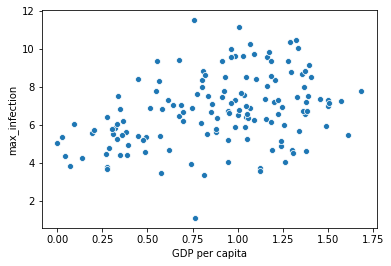

In [49]:
x = data["GDP per capita"]
y = data["max_infection"]
sns.scatterplot(x, np.log(y))

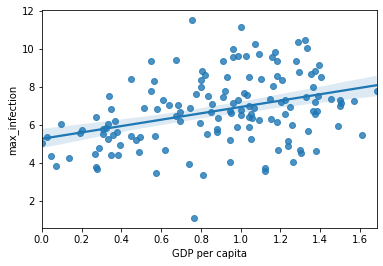

In [50]:
x = data["GDP per capita"]
y = data["max_infection"]
sns.regplot(x, np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

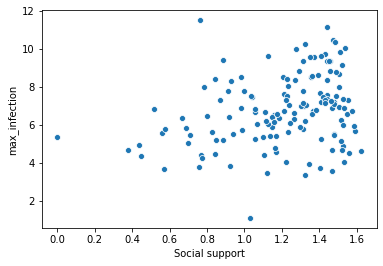

In [51]:
x = data["Social support"]
y = data["max_infection"]
sns.scatterplot(x, np.log(y))

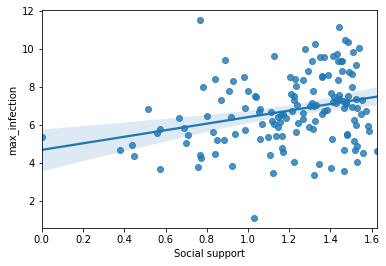

In [52]:
x = data["Social support"]
y = data["max_infection"]
sns.regplot(x, np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

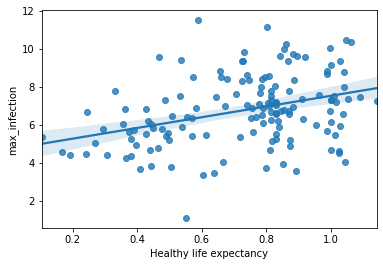

In [53]:
x = data["Healthy life expectancy"]
y = data["max_infection"]
sns.regplot(x, np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

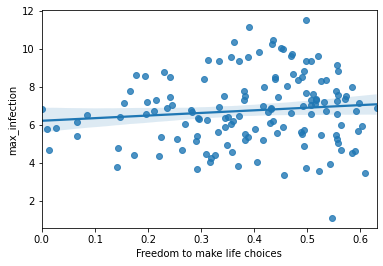

In [54]:
x = data["Freedom to make life choices"]
y = data["max_infection"]
sns.regplot(x, np.log(y))

### Extra: Plotting Generosity vs maximum Infection rate

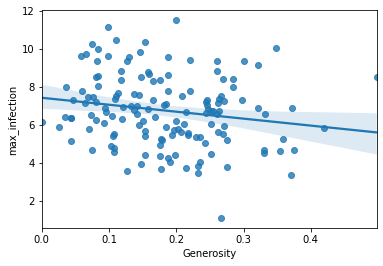

In [55]:
x = data["Generosity"]
y = data["max_infection"]
sns.regplot(x, np.log(y))

### Extra: Plotting Perceptions of corruption vs maximum Infection rate

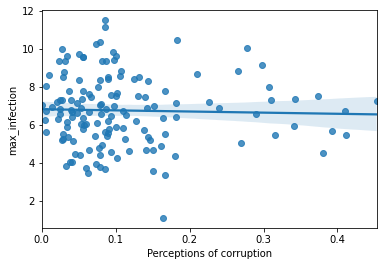

In [56]:
x = data["Perceptions of corruption"]
y = data["max_infection"]
sns.regplot(x, np.log(y))